In [1]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
import cv2
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
#from tensorflow.python.keras.layers.normalization import BatchNormalization
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn as sns

In [5]:
datapath = 'D:\\Deepfake\\dataset\\real_vs_fake\\real-vs-fake\\'

image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    datapath + 'train/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    datapath + 'valid/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    datapath + 'test/', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = np.random.randint(20000)
    fig, ax = plt.subplots(3,3, figsize=(8,8))
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    plt.suptitle(set_ + ' faces from train dataset')
    return plt

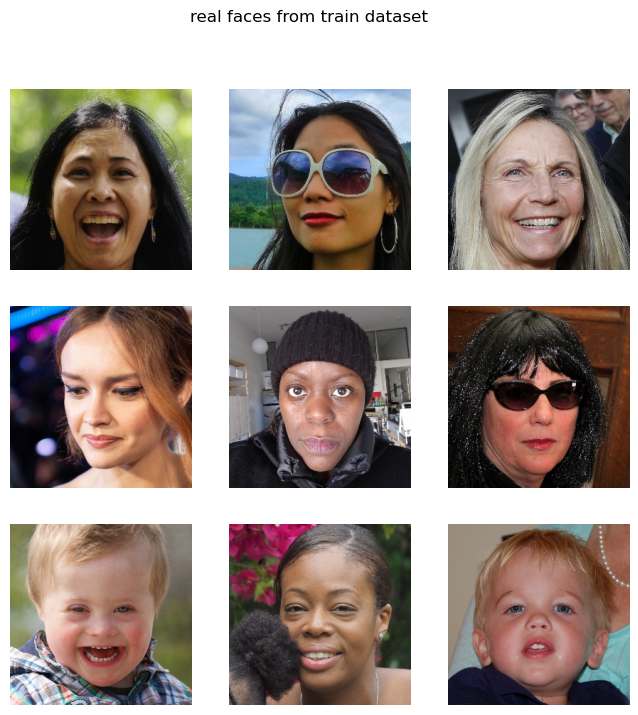

In [7]:
plot_img(datapath, 'real').show()

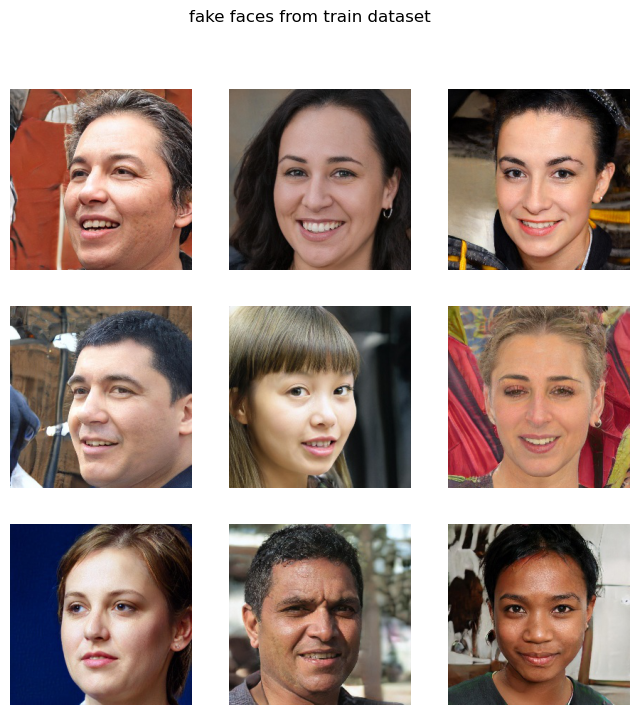

In [8]:
plot_img(datapath, 'fake').show()

In [9]:
input_shape = (224,224,3)
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

In [11]:
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [6]:
#model = tf.keras.models.load_model('saved-final-model-1.h5')

In [12]:
from keras.callbacks import ModelCheckpoint
filepath = "saved-final-model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
train_steps = 80000//64
valid_steps = 5000//64

history = model.fit_generator(
    train_flow,
    epochs =4,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

C:\Users\Abhinav Sharma\AppData\Local\Temp\ipykernel_8788\3324169794.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/4



1250/1250 [==============================] - ETA: 0s - loss: 0.5478 - accuracy: 0.7404
Epoch 1: val_accuracy improved from -inf to 0.71695, saving model to saved-final-model.h5


D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 3464s 3s/step - loss: 0.5478 - accuracy: 0.7404 - val_loss: 0.5895 - val_accuracy: 0.7169
Epoch 2/4
1250/1250 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8348
Epoch 2: val_accuracy improved from 0.71695 to 0.76282, saving model to saved-final-model.h5
1250/1250 [==============================] - 5213s 4s/step - loss: 0.3739 - accuracy: 0.8348 - val_loss: 0.5489 - val_accuracy: 0.7628
Epoch 3/4
1250/1250 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8827
Epoch 3: val_accuracy improved from 0.76282 to 0.79367, saving model to saved-final-model.h5
1250/1250 [==============================] - 4044s 3s/step - loss: 0.2797 - accuracy: 0.8827 - val_loss: 0.4829 - val_accuracy: 0.7937
Epoch 4/4
1250/1250 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9137
Epoch 4: val_accuracy improved from 0.79367 to 0.80308, saving model to saved-final-model.h5
1250/1250 [==============

In [14]:
history = model.fit_generator(
    train_flow,
    epochs =2,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

C:\Users\Abhinav Sharma\AppData\Local\Temp\ipykernel_8788\4257545812.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
1250/1250 [==============================] - ETA: 0s - loss: 0.1625 - accuracy: 0.9342
Epoch 1: val_accuracy improved from 0.80308 to 0.88602, saving model to saved-final-model.h5
1250/1250 [==============================] - 4203s 3s/step - loss: 0.1625 - accuracy: 0.9342 - val_loss: 0.2797 - val_accuracy: 0.8860
Epoch 2/2
1250/1250 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9494
Epoch 2: val_accuracy improved from 0.88602 to 0.90705, saving model to saved-final-model.h5
1250/1250 [==============================] - 3869s 3s/step - loss: 0.1276 - accuracy: 0.9494 - val_loss: 0.2367 - val_accuracy: 0.9071


In [15]:
model.save("saved-final-model-1.h5")

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

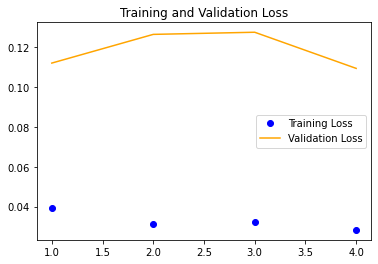

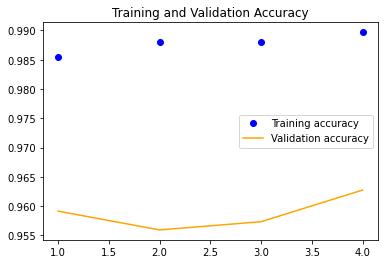

In [17]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [18]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 806s 40ms/step


Accuracy Score : 0.90525
Report : 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     10000
           1       0.99      0.82      0.90     10000

    accuracy                           0.91     20000
   macro avg       0.92      0.91      0.90     20000
weighted avg       0.92      0.91      0.90     20000



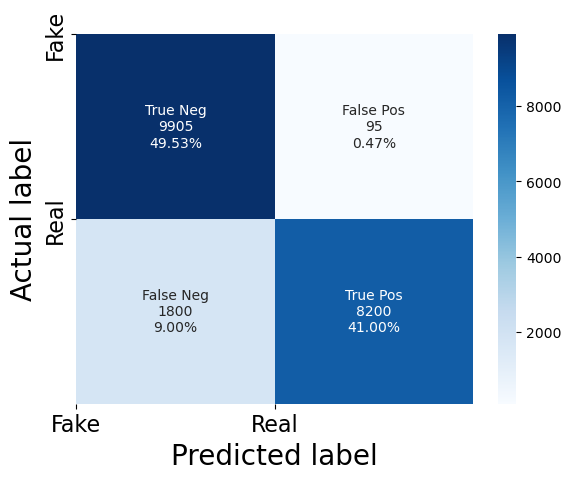

In [19]:
results = confusion_matrix(y_test, y_pred > 0.5) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues')
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [20]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.9915697099999999
AP Score: 0.9908825520699754


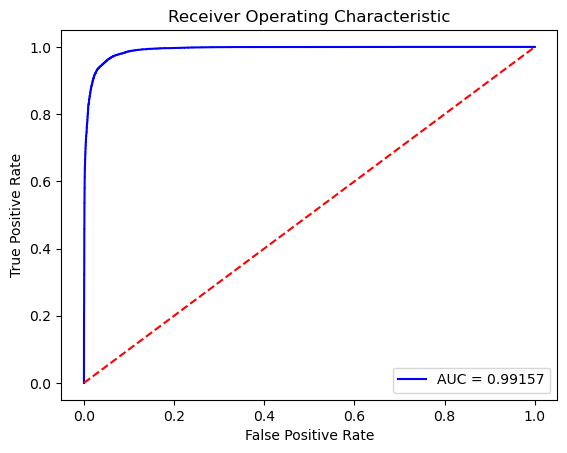

In [21]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1/1 [==============================] - 1s 515ms/step


Text(0.5, 1.0, 'Predicted by the model as FAKE, actually is FAKE')

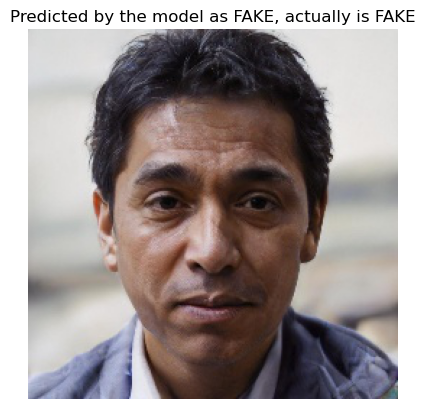

In [22]:
i = np.random.randint(20000)
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [23]:
def predict_img_class():
    k = np.random.randint(20000)
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx,gridy, figsize=(14,14))
    for j in range(gridx):
        for i in range(gridy):
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
            if model.predict(test_flow[k][0])[0][0]<0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
            datasetpath = test_flow.filenames[k]
            imgpath = datapath+'test/'+datasetpath
            img = load_img(imgpath)          
            ax[j,i].imshow(img)
            ax[j,i].set_title(f"Predicted: {prediction}, Actual: {actual}",size = 12)
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    fig.suptitle('Testing the prediction on Test images', size = 20)
    return plt

1/1 [==============================] - 0s 75ms/step


<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

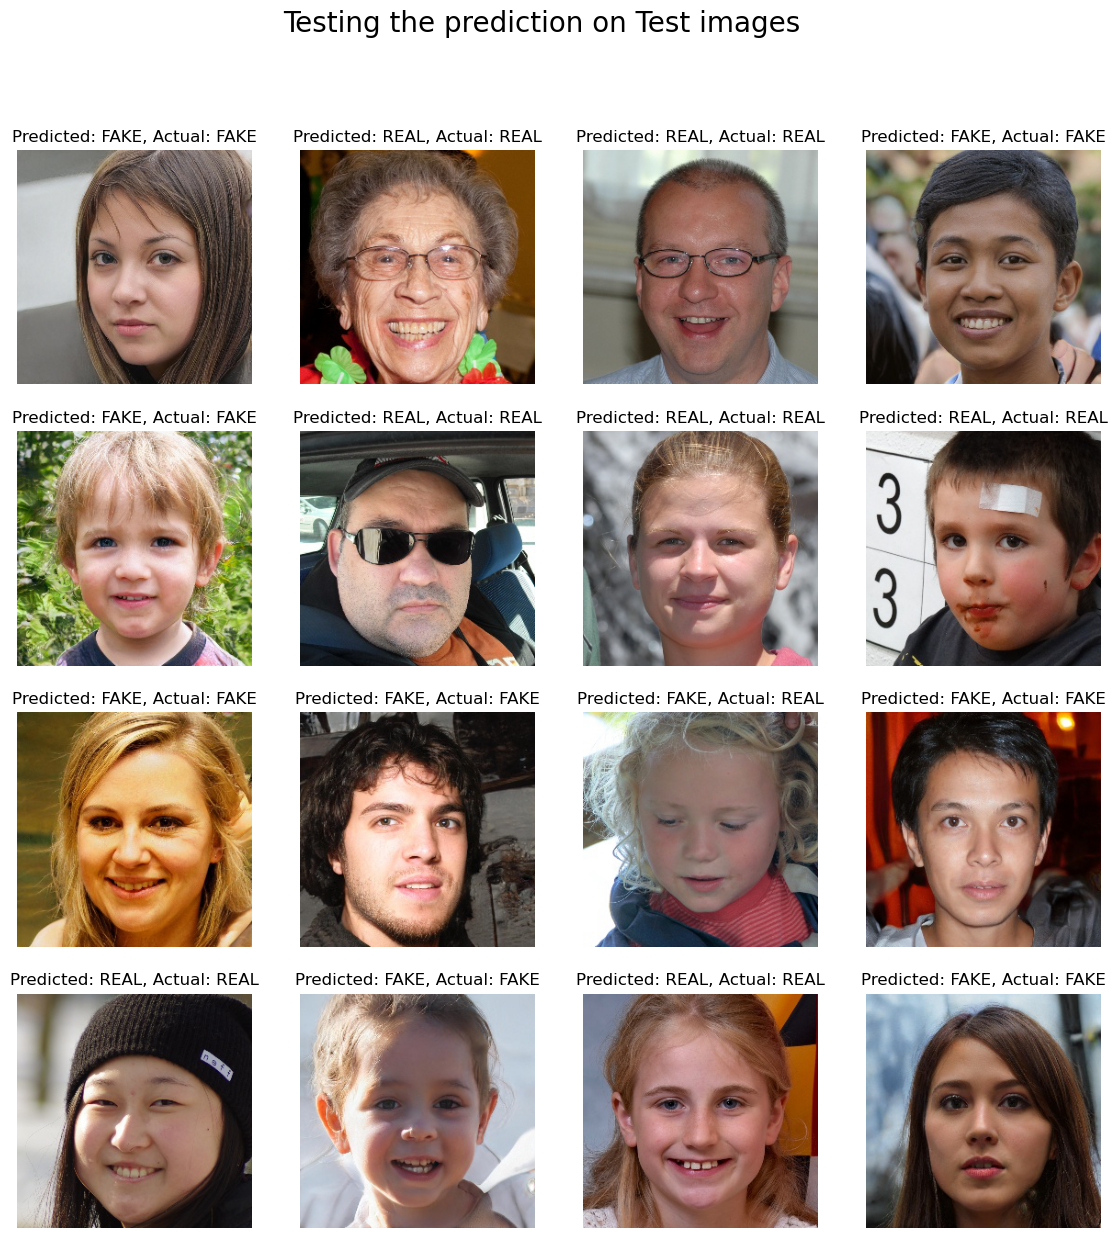

In [24]:
predict_img_class()